In [295]:
"""
Authors: Viktoriia Vlasenko
Index number: 317013
Date: 30.12.2023
"""


import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class Gaussian_Wave:
    
    def __init__(self, N_grid, L, V0, x0, k0, delta_k, sigma, t):
        
        self.t = t
        self.N_grid = N_grid
        self.L = L
        self.V0 = V0
        self.x0 = x0
        self.k0 = k0
        self.delta_k = delta_k
        self.sigma = sigma

        self.J = self.N_grid - 1
        self.x = np.linspace(-5, self.L, self.J)
        self.dx = self.x[1] - self.x[0]
        self.dt = self.t[1] - self.t[0]
               
        C = np.sqrt(self.delta_k) / (np.pi**0.25)
        self.Psi0 = C * np.exp(-(self.x*self.delta_k)**2 / 2.0) * np.exp(1j * self.k0 * self.x)
        self.Psi0[0] = 0
        self.Psi0[-1] = 0

    
        self.V = V0 * np.exp(-(self.x - self.x0)**2 / self.sigma**2)
        AA = np.zeros((self.J-2, self.J-2), dtype="complex")

        a_j = (-1j*self.dt) / (2 * (self.dx**2))
        b_j = 1 + (1j * self.dt / 2) * (2 / (self.dx**2) + self.V[:self.J-2])

        AA += (np.diag(b_j) + np.diag(a_j * np.ones(self.J-3), k=1) + np.diag(a_j * np.ones(self.J-3), k=-1))
        self.A = sparse.csr_matrix(AA)

        self.r = []
        for j in range(1, self.J-1):
            self.r.append(self.Psi0[j] + 1j*self.dt/2*((self.Psi0[j+1]-2*self.Psi0[j]+self.Psi0[j-1])/self.dx**2-self.V[j]*self.Psi0[j]))
        

    def animation(self):

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
        line, = ax1.plot([], [], lw=2)

        ax1.plot(self.x, self.V/1800, label='$V(x) barrier')
        line1, = ax1.plot(self.x, np.zeros(self.N_grid-1), lw=1, color="red", label='$\Re(\psi)$')
        line2, = ax1.plot(self.x, np.zeros(self.N_grid-1), lw=1, color="blue", label='$\Im(\psi)$')
        line3, = ax1.plot(self.x, np.zeros(self.N_grid-1), lw=1, color="green", label='$|\psi|^2$')
        
        line4, = ax2.plot(self.x, np.zeros(self.N_grid-1), lw=1, color="red", label='$\Re(\psi)$')
        line5, = ax2.plot(self.x, np.zeros(self.N_grid-1), lw=1, color="blue", label='$\Im(\psi)$')
        line6, = ax2.plot(self.x, np.zeros(self.N_grid-1), lw=1, color="green", label='$|\psi|^2$')        

        for ax in [ax1, ax2]:
            ax.set_xlim(-5, self.L)
            ax.set_ylim(-0.05, 0.05)
            ax.set_xlabel('$x$', fontsize=15)
            ax.legend(fontsize=12)

            
        def animate(t):
            self.Psi0[1:-1] = spsolve(self.A, self.r)
        
            y1 = np.real(self.Psi0)
            y2 = np.imag(self.Psi0)
            
            line1.set_data(self.x, self.dx*y1)
            line2.set_data(self.x, self.dx*y2)
            line3.set_data(self.x, self.dx*np.abs(self.Psi0)**2)
            line4.set_data(self.x, self.dx*y1)
            line5.set_data(self.x, self.dx*y2)
            line6.set_data(self.x, self.dx*np.abs(self.Psi0)**2)

            self.r = []
            for j in range(1, self.J-1):
                self.r.append(self.Psi0[j] + 1j*self.dt/2*((self.Psi0[j+1]-2*self.Psi0[j]+self.Psi0[j-1])/self.dx**2-self.V[j]*self.Psi0[j]))
            return line1, line2, line3, line4, line5, line6,

        def init():
            line1.set_data([], [])
            line2.set_data([], [])
            line3.set_data([], [])
            line4.set_data([], [])
            line5.set_data([], [])
            line6.set_data([], [])
            return line1, line2, line3, line4, line5, line6,

        ani = FuncAnimation(fig, animate, len(self.t), init_func=init,
                            interval=30, blit=False)

        return ani

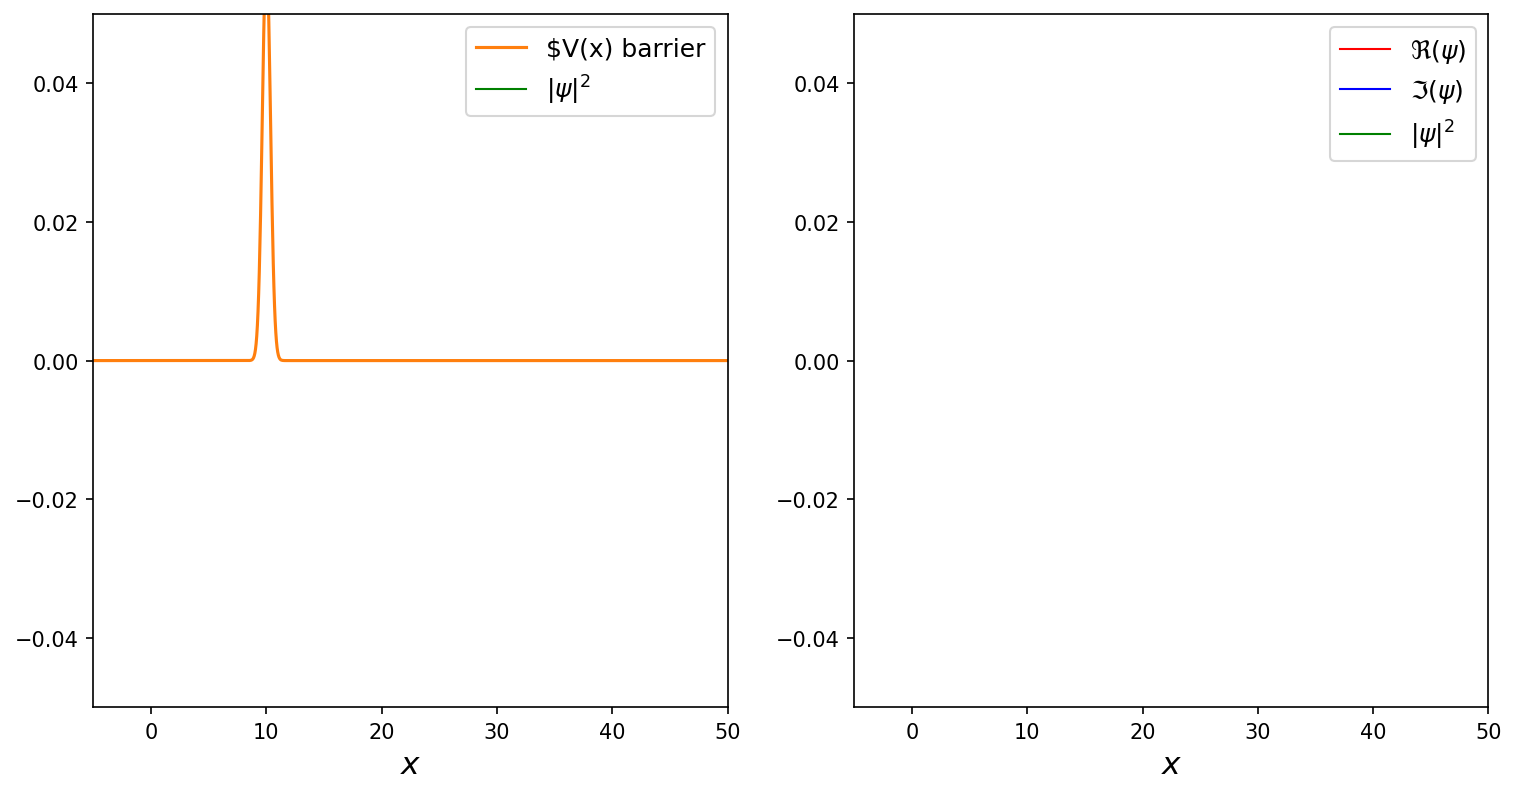

In [296]:
# Animation:
wavepacket = Gaussian_Wave(1000, 50, 105, 10, 10, 0.5, 0.5, np.arange(0., 1.5, 0.002)) #N, L, V0, x0, k0, delta_k, sigma, time(tmin, tmax, dt)
Psi = wavepacket.animation()
HTML(Psi.to_html5_video())